# Detection of components in PID diagrams

### Imports

In [1]:
import os
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

### Paths definitions

In [2]:
outputPath = 'out'
imagesInputPath = os.path.join('..', 'PatternImages')
outputTrainingPath = os.path.join(outputPath, 'train')
outputTestPath = os.path.join(outputPath, 'test')

### Generation of the training and test dataset

In [3]:
cd /u01/notebooks/TFM/DatasetCreator

/u01/notebooks/TFM/DatasetCreator


Import of the program of automatic generation of images

In [13]:
from datasetCreate import DatasetCreate

Define the number of training and test images that we want to generate

In [9]:
trainingImagesNumber = 500
testImagesNumber = 50
dc = DatasetCreate(imagesInputPath, outputPath)

Generating training images

In [6]:
dc.generateDataset(trainingImagesNumber, outputTrainingPath, os.path.join(outputPath, 'train.record'))

diagram1.jpg | Diagram size: 7x24 cells | Cell size: 72 | numComponents: 16
diagram2.jpg | Diagram size: 27x19 cells | Cell size: 160 | numComponents: 51
diagram3.jpg | Diagram size: 10x8 cells | Cell size: 329 | numComponents: 8
diagram4.jpg | Diagram size: 6x11 cells | Cell size: 159 | numComponents: 6
diagram5.jpg | Diagram size: 19x25 cells | Cell size: 146 | numComponents: 47
diagram6.jpg | Diagram size: 28x27 cells | Cell size: 217 | numComponents: 75
diagram7.jpg | Diagram size: 21x20 cells | Cell size: 338 | numComponents: 42
diagram8.jpg | Diagram size: 25x8 cells | Cell size: 176 | numComponents: 20
diagram9.jpg | Diagram size: 16x30 cells | Cell size: 89 | numComponents: 48
diagram10.jpg | Diagram size: 14x24 cells | Cell size: 203 | numComponents: 33
diagram11.jpg | Diagram size: 29x20 cells | Cell size: 73 | numComponents: 58
diagram12.jpg | Diagram size: 21x26 cells | Cell size: 74 | numComponents: 54
diagram13.jpg | Diagram size: 27x22 cells | Cell size: 333 | numCompone

diagram106.jpg | Diagram size: 22x10 cells | Cell size: 342 | numComponents: 22
diagram107.jpg | Diagram size: 22x18 cells | Cell size: 179 | numComponents: 39
diagram108.jpg | Diagram size: 9x13 cells | Cell size: 263 | numComponents: 11
diagram109.jpg | Diagram size: 16x25 cells | Cell size: 259 | numComponents: 40
diagram110.jpg | Diagram size: 15x13 cells | Cell size: 115 | numComponents: 19
diagram111.jpg | Diagram size: 17x14 cells | Cell size: 174 | numComponents: 23
diagram112.jpg | Diagram size: 17x20 cells | Cell size: 207 | numComponents: 34
diagram113.jpg | Diagram size: 24x27 cells | Cell size: 297 | numComponents: 64
diagram114.jpg | Diagram size: 30x22 cells | Cell size: 165 | numComponents: 66
diagram115.jpg | Diagram size: 27x8 cells | Cell size: 85 | numComponents: 21
diagram116.jpg | Diagram size: 16x29 cells | Cell size: 221 | numComponents: 46
diagram117.jpg | Diagram size: 5x13 cells | Cell size: 275 | numComponents: 6
diagram118.jpg | Diagram size: 28x21 cells | 

diagram211.jpg | Diagram size: 12x23 cells | Cell size: 134 | numComponents: 27
diagram212.jpg | Diagram size: 18x11 cells | Cell size: 203 | numComponents: 19
diagram213.jpg | Diagram size: 30x14 cells | Cell size: 187 | numComponents: 42
diagram214.jpg | Diagram size: 22x7 cells | Cell size: 295 | numComponents: 15
diagram215.jpg | Diagram size: 9x15 cells | Cell size: 324 | numComponents: 13
diagram216.jpg | Diagram size: 16x30 cells | Cell size: 304 | numComponents: 48
diagram217.jpg | Diagram size: 14x14 cells | Cell size: 215 | numComponents: 19
diagram218.jpg | Diagram size: 23x14 cells | Cell size: 268 | numComponents: 32
diagram219.jpg | Diagram size: 24x9 cells | Cell size: 172 | numComponents: 21
diagram220.jpg | Diagram size: 10x21 cells | Cell size: 241 | numComponents: 21
diagram221.jpg | Diagram size: 30x7 cells | Cell size: 73 | numComponents: 21
diagram222.jpg | Diagram size: 19x15 cells | Cell size: 177 | numComponents: 28
diagram223.jpg | Diagram size: 14x13 cells | 

diagram315.jpg | Diagram size: 12x5 cells | Cell size: 134 | numComponents: 6
diagram316.jpg | Diagram size: 10x15 cells | Cell size: 119 | numComponents: 15
diagram317.jpg | Diagram size: 26x6 cells | Cell size: 74 | numComponents: 15
diagram318.jpg | Diagram size: 17x16 cells | Cell size: 216 | numComponents: 27
diagram319.jpg | Diagram size: 23x9 cells | Cell size: 256 | numComponents: 20
diagram320.jpg | Diagram size: 5x8 cells | Cell size: 176 | numComponents: 4
diagram321.jpg | Diagram size: 8x24 cells | Cell size: 188 | numComponents: 19
diagram322.jpg | Diagram size: 12x11 cells | Cell size: 231 | numComponents: 13
diagram323.jpg | Diagram size: 19x25 cells | Cell size: 339 | numComponents: 47
diagram324.jpg | Diagram size: 29x15 cells | Cell size: 126 | numComponents: 43
diagram325.jpg | Diagram size: 12x29 cells | Cell size: 246 | numComponents: 34
diagram326.jpg | Diagram size: 19x10 cells | Cell size: 148 | numComponents: 19
diagram327.jpg | Diagram size: 6x12 cells | Cell 

diagram423.jpg | Diagram size: 7x18 cells | Cell size: 254 | numComponents: 12
diagram424.jpg | Diagram size: 15x6 cells | Cell size: 158 | numComponents: 9
diagram425.jpg | Diagram size: 9x6 cells | Cell size: 220 | numComponents: 5
diagram426.jpg | Diagram size: 19x25 cells | Cell size: 267 | numComponents: 47
diagram427.jpg | Diagram size: 21x14 cells | Cell size: 261 | numComponents: 29
diagram428.jpg | Diagram size: 17x17 cells | Cell size: 177 | numComponents: 28
diagram429.jpg | Diagram size: 8x28 cells | Cell size: 83 | numComponents: 22
diagram430.jpg | Diagram size: 16x21 cells | Cell size: 76 | numComponents: 33
diagram431.jpg | Diagram size: 8x23 cells | Cell size: 170 | numComponents: 18
diagram432.jpg | Diagram size: 5x22 cells | Cell size: 109 | numComponents: 11
diagram433.jpg | Diagram size: 24x7 cells | Cell size: 316 | numComponents: 16
diagram434.jpg | Diagram size: 20x7 cells | Cell size: 136 | numComponents: 14
diagram435.jpg | Diagram size: 13x17 cells | Cell siz

diagram529.jpg | Diagram size: 21x19 cells | Cell size: 298 | numComponents: 39
diagram530.jpg | Diagram size: 26x28 cells | Cell size: 283 | numComponents: 72
diagram531.jpg | Diagram size: 19x23 cells | Cell size: 304 | numComponents: 43
diagram532.jpg | Diagram size: 21x25 cells | Cell size: 187 | numComponents: 52
diagram533.jpg | Diagram size: 30x14 cells | Cell size: 139 | numComponents: 42
diagram534.jpg | Diagram size: 27x23 cells | Cell size: 218 | numComponents: 62
diagram535.jpg | Diagram size: 15x11 cells | Cell size: 95 | numComponents: 16
diagram536.jpg | Diagram size: 29x18 cells | Cell size: 250 | numComponents: 52
diagram537.jpg | Diagram size: 28x21 cells | Cell size: 258 | numComponents: 58
diagram538.jpg | Diagram size: 18x16 cells | Cell size: 303 | numComponents: 28
diagram539.jpg | Diagram size: 7x19 cells | Cell size: 215 | numComponents: 13
diagram540.jpg | Diagram size: 13x12 cells | Cell size: 284 | numComponents: 15
diagram541.jpg | Diagram size: 13x6 cells 

diagram633.jpg | Diagram size: 22x6 cells | Cell size: 248 | numComponents: 13
diagram634.jpg | Diagram size: 22x17 cells | Cell size: 285 | numComponents: 37
diagram635.jpg | Diagram size: 9x22 cells | Cell size: 329 | numComponents: 19
diagram636.jpg | Diagram size: 11x15 cells | Cell size: 131 | numComponents: 16
diagram637.jpg | Diagram size: 21x19 cells | Cell size: 164 | numComponents: 39
diagram638.jpg | Diagram size: 9x26 cells | Cell size: 292 | numComponents: 23
diagram639.jpg | Diagram size: 30x9 cells | Cell size: 242 | numComponents: 27
diagram640.jpg | Diagram size: 26x7 cells | Cell size: 294 | numComponents: 18
diagram641.jpg | Diagram size: 23x30 cells | Cell size: 330 | numComponents: 69
diagram642.jpg | Diagram size: 10x13 cells | Cell size: 298 | numComponents: 13
diagram643.jpg | Diagram size: 21x17 cells | Cell size: 335 | numComponents: 35
diagram644.jpg | Diagram size: 26x18 cells | Cell size: 225 | numComponents: 46
diagram645.jpg | Diagram size: 5x9 cells | Ce

diagram737.jpg | Diagram size: 17x7 cells | Cell size: 153 | numComponents: 11
diagram738.jpg | Diagram size: 6x25 cells | Cell size: 103 | numComponents: 15
diagram739.jpg | Diagram size: 11x6 cells | Cell size: 330 | numComponents: 6
diagram740.jpg | Diagram size: 10x18 cells | Cell size: 198 | numComponents: 18
diagram741.jpg | Diagram size: 10x25 cells | Cell size: 225 | numComponents: 25
diagram742.jpg | Diagram size: 17x5 cells | Cell size: 187 | numComponents: 8
diagram743.jpg | Diagram size: 27x21 cells | Cell size: 120 | numComponents: 56
diagram744.jpg | Diagram size: 26x7 cells | Cell size: 170 | numComponents: 18
diagram745.jpg | Diagram size: 15x26 cells | Cell size: 202 | numComponents: 39
diagram746.jpg | Diagram size: 20x23 cells | Cell size: 276 | numComponents: 46
diagram747.jpg | Diagram size: 24x8 cells | Cell size: 90 | numComponents: 19
diagram748.jpg | Diagram size: 26x22 cells | Cell size: 235 | numComponents: 57
diagram749.jpg | Diagram size: 27x24 cells | Cell

diagram841.jpg | Diagram size: 7x19 cells | Cell size: 210 | numComponents: 13
diagram842.jpg | Diagram size: 7x10 cells | Cell size: 230 | numComponents: 7
diagram843.jpg | Diagram size: 15x17 cells | Cell size: 258 | numComponents: 25
diagram844.jpg | Diagram size: 7x9 cells | Cell size: 328 | numComponents: 6
diagram845.jpg | Diagram size: 6x13 cells | Cell size: 146 | numComponents: 7
diagram846.jpg | Diagram size: 28x11 cells | Cell size: 340 | numComponents: 30
diagram847.jpg | Diagram size: 27x8 cells | Cell size: 126 | numComponents: 21
diagram848.jpg | Diagram size: 11x15 cells | Cell size: 271 | numComponents: 16
diagram849.jpg | Diagram size: 7x15 cells | Cell size: 310 | numComponents: 10
diagram850.jpg | Diagram size: 27x18 cells | Cell size: 334 | numComponents: 48
diagram851.jpg | Diagram size: 29x6 cells | Cell size: 188 | numComponents: 17
diagram852.jpg | Diagram size: 19x10 cells | Cell size: 325 | numComponents: 19
diagram853.jpg | Diagram size: 19x19 cells | Cell s

diagram945.jpg | Diagram size: 11x15 cells | Cell size: 273 | numComponents: 16
diagram946.jpg | Diagram size: 14x17 cells | Cell size: 158 | numComponents: 23
diagram947.jpg | Diagram size: 27x18 cells | Cell size: 257 | numComponents: 48
diagram948.jpg | Diagram size: 17x13 cells | Cell size: 262 | numComponents: 22
diagram949.jpg | Diagram size: 12x12 cells | Cell size: 244 | numComponents: 14
diagram950.jpg | Diagram size: 10x29 cells | Cell size: 110 | numComponents: 29
diagram951.jpg | Diagram size: 7x12 cells | Cell size: 296 | numComponents: 8
diagram952.jpg | Diagram size: 22x5 cells | Cell size: 347 | numComponents: 11
diagram953.jpg | Diagram size: 9x26 cells | Cell size: 112 | numComponents: 23
diagram954.jpg | Diagram size: 28x26 cells | Cell size: 227 | numComponents: 72
diagram955.jpg | Diagram size: 27x14 cells | Cell size: 117 | numComponents: 37
diagram956.jpg | Diagram size: 23x12 cells | Cell size: 191 | numComponents: 27
diagram957.jpg | Diagram size: 20x12 cells |

/root/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (99470000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/root/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (93867200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Successfully created the TFRecords: /u01/notebooks/TFM/DatasetCreator/out/train.record


Generating test images

In [7]:
dc.generateDataset(testImagesNumber, outputTestPath, os.path.join(outputPath, 'test.record'))

diagram1.jpg | Diagram size: 13x14 cells | Cell size: 156 | numComponents: 18
diagram2.jpg | Diagram size: 12x20 cells | Cell size: 282 | numComponents: 24
diagram3.jpg | Diagram size: 21x6 cells | Cell size: 110 | numComponents: 12
diagram4.jpg | Diagram size: 27x9 cells | Cell size: 120 | numComponents: 24
diagram5.jpg | Diagram size: 24x18 cells | Cell size: 259 | numComponents: 43
diagram6.jpg | Diagram size: 15x10 cells | Cell size: 77 | numComponents: 15
diagram7.jpg | Diagram size: 19x6 cells | Cell size: 156 | numComponents: 11
diagram8.jpg | Diagram size: 14x12 cells | Cell size: 120 | numComponents: 16
diagram9.jpg | Diagram size: 22x9 cells | Cell size: 158 | numComponents: 19
diagram10.jpg | Diagram size: 26x23 cells | Cell size: 257 | numComponents: 59
diagram11.jpg | Diagram size: 23x27 cells | Cell size: 339 | numComponents: 62
diagram12.jpg | Diagram size: 19x15 cells | Cell size: 221 | numComponents: 28
diagram13.jpg | Diagram size: 30x18 cells | Cell size: 306 | numCo

/root/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (91329120 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Successfully created the TFRecords: /u01/notebooks/TFM/DatasetCreator/out/test.record


Generate pbtxt file with  labels

In [8]:
dc.generatePbtxt()

Check image generate

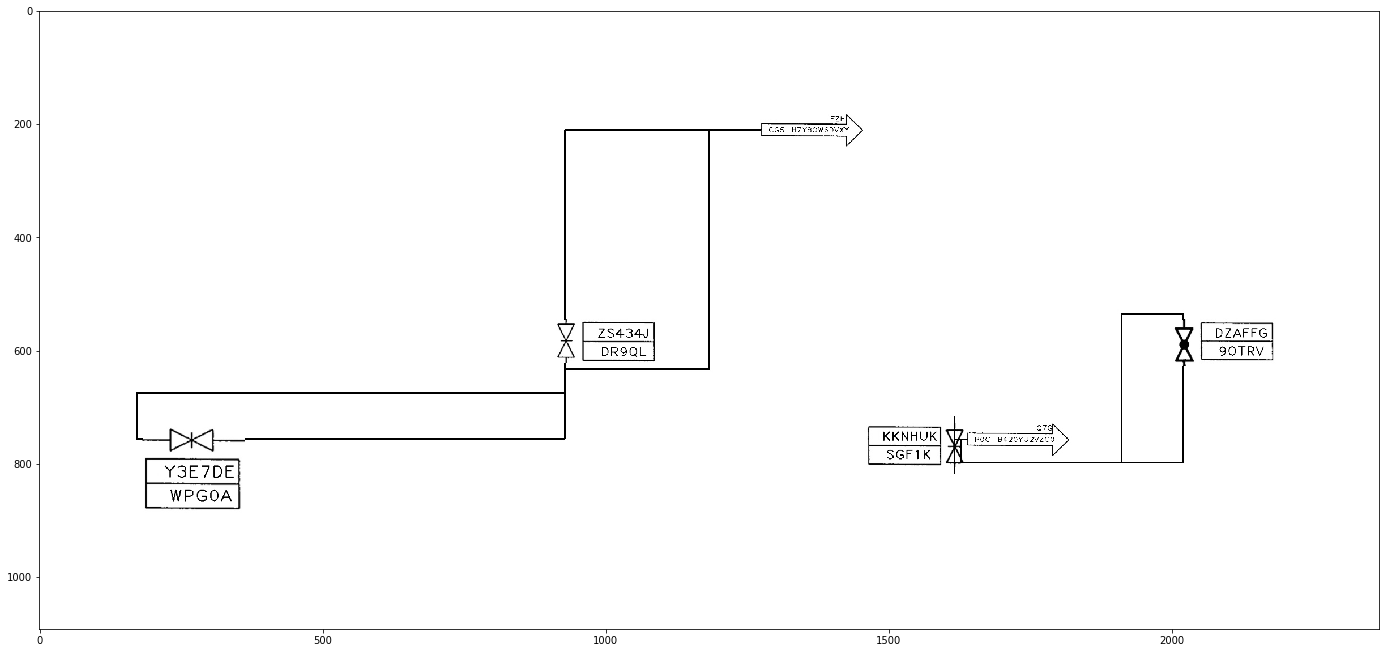

In [10]:
image = Image.open('out/train/diagram1.jpg')
plt.figure(figsize=(24, 16))
plt.imshow(image, cmap='Greys_r')

### Training model

In [12]:
cd /u01/notebooks/models/research/

/u01/notebooks/models/research


Launch tensorflow object detection 

In [ ]:
!python object_detection/model_main.py  \
--pipeline_config_path=/u01/notebooks/TFM/Configs/rfcn_resnet101.config  --model_dir=/u01/notebooks/trainingmodel \
--num_train_steps=10000  \
--num_eval_steps=500   \
--alsologtostderr

### Export training model

In [9]:
cd /u01/notebooks/models/research/

/u01/notebooks/models/research


In [23]:
!python object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/u01/notebooks/TFM/Configs/rfcn_resnet101.config \
    --trained_checkpoint_prefix=/u01/notebooks/trainingmodel/model.ckpt-0 \
    --output_directory=/u01/notebooks/exportmodel

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
316 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops     

316 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

  SecondStageBoxPredictor/map_1/while/add_37 (1/1 flops)
  SecondStageBoxPredictor/mul (1/1 flops)
  SecondStageBoxPredictor/mul_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/Less (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/Less_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/sub (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/sub_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/truediv (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/truediv_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Greater (1/1 flops)
  Secon

### Test model

In [4]:
import matplotlib
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import tensorflow as tf
import cv2
import numpy as np

Paths definitions

In [5]:
cd /u01/notebooks/TFM/DetectionComponentsAPI

/u01/notebooks/TFM/DetectionComponentsAPI


In [14]:
# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = 'frozen_inference_graph.pb'

# Path to label map file
PATH_TO_LABELS = 'label_map.pbtxt'

# Path to image
PATH_TO_IMAGE = '/u01/notebooks/TFM/PatternImages/navigationRight.jpg'

# Number of classes the object detector can identify
NUM_CLASSES = 13

In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [8]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

sess = tf.Session(graph=detection_graph)

In [9]:
# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [10]:
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

In [ ]:
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

In [21]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
min_score_thresh=0.50)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

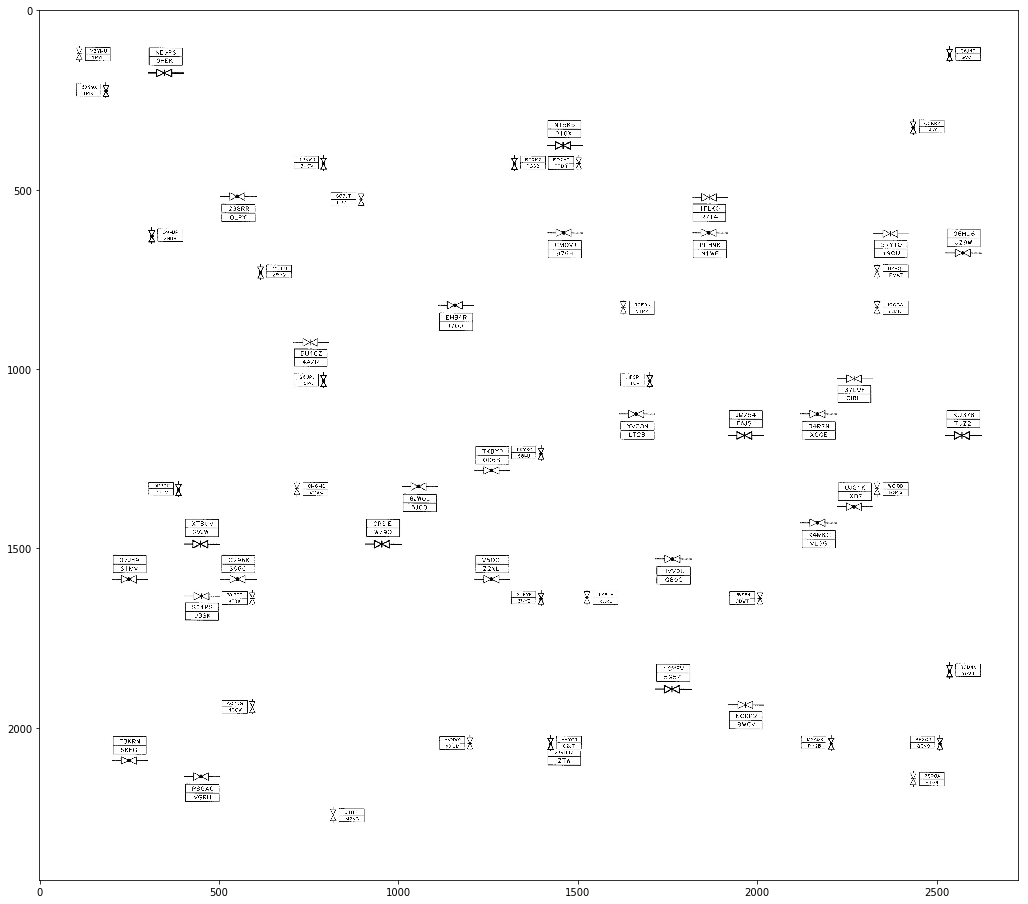

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(24, 16))
plt.imshow(image)